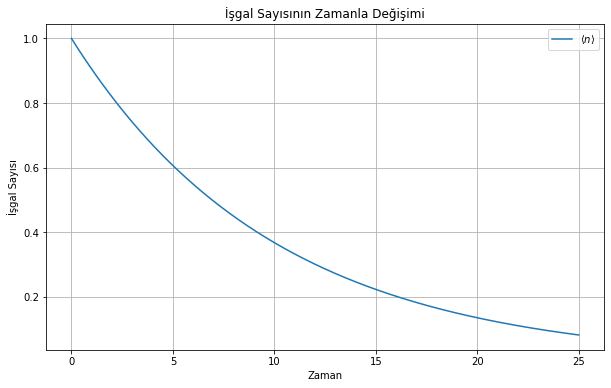

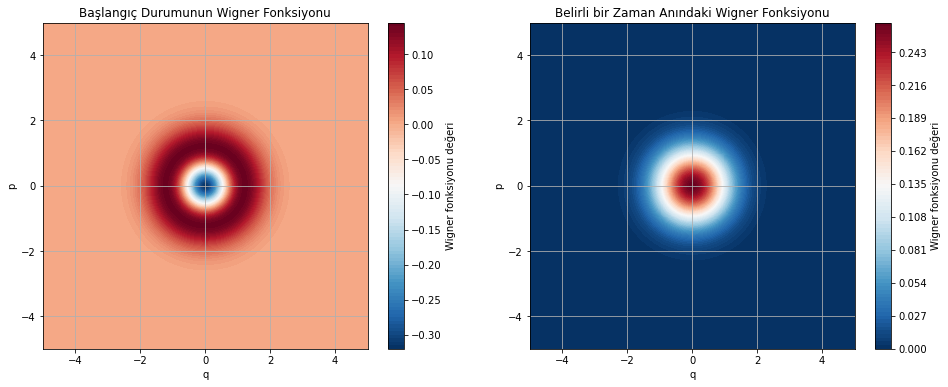

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, destroy, mesolve, expect, wigner, Qobj

# Sistem parametreleri
N = 50  # Hilbert space dimension
omega = 1.0  # Harmonic oscillator frequency
kappa = 0.1  # Damping rate
tlist = np.linspace(0, 25, 1000)  # Time array

# Başlangıç durumu |1> Fock state
psi0 = basis(N, 1)

# Operatörler
a = destroy(N)  # Annihilation operator
H = omega * a.dag() * a  # Hamiltonian

# Çözücü parametreleri
c_ops = [np.sqrt(kappa) * a]  # Collapse operators
e_ops = [a.dag() * a]  # Operators to evaluate

# Çözüm seçenekleri
options = {'store_states': True}

# Master equation çözümü
result = mesolve(H, psi0, tlist, c_ops, e_ops, options=options)

# Beklenen değerler
n_t = result.expect[0]

# Beklenen işgal sayısının zamanla değişimi
plt.figure(figsize=(10, 6))
plt.plot(tlist, n_t, label=r'$\langle n \rangle$')
plt.xlabel('Zaman')
plt.ylabel('İşgal Sayısı')
plt.title('İşgal Sayısının Zamanla Değişimi')
plt.legend()
plt.grid()
plt.show()

# Wigner fonksiyonu başlangıç durumu için
rho_initial = psi0 * psi0.dag()  # Density matrix of initial state
xvec = np.linspace(-5, 5, 500)
W0 = wigner(rho_initial, xvec, xvec)

# Eğer `result.states` listesi boş değilse son durumu hesaplayalım
if result.states:
    rho_final = result.states[-1]  # Density matrix of final state
    W_final = wigner(rho_final, xvec, xvec)
else:
    W_final = None

# Wigner fonksiyonu plotları
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Başlangıç durumu için Wigner fonksiyonu
contour0 = axs[0].contourf(xvec, xvec, W0, 100, cmap='RdBu_r')
fig.colorbar(contour0, ax=axs[0], label='Wigner fonksiyonu değeri')
axs[0].set_title('Başlangıç Durumunun Wigner Fonksiyonu')
axs[0].set_xlabel('q')
axs[0].set_ylabel('p')
axs[0].grid()

# Belirli bir zaman anı için Wigner fonksiyonu
if W_final is not None:
    contour_final = axs[1].contourf(xvec, xvec, W_final, 100, cmap='RdBu_r')
    fig.colorbar(contour_final, ax=axs[1], label='Wigner fonksiyonu değeri')
    axs[1].set_title('Belirli bir Zaman Anındaki Wigner Fonksiyonu')
    axs[1].set_xlabel('q')
    axs[1].set_ylabel('p')
    axs[1].grid()
else:
    axs[1].text(0.5, 0.5, 'Son durum bilgisi mevcut değil', horizontalalignment='center', verticalalignment='center')
    axs[1].set_title('Son Durum Bilgisi Mevcut Değil')
    axs[1].set_xlabel('q')
    axs[1].set_ylabel('p')
    axs[1].grid()

plt.show()


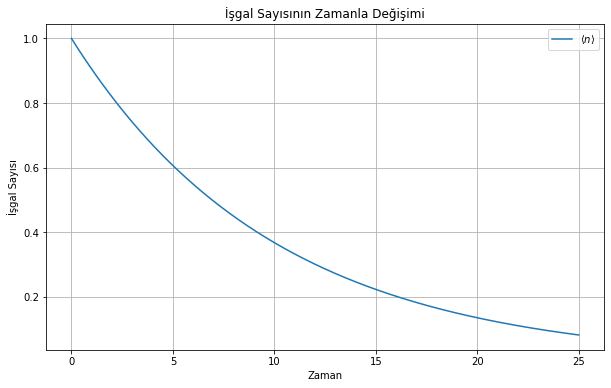

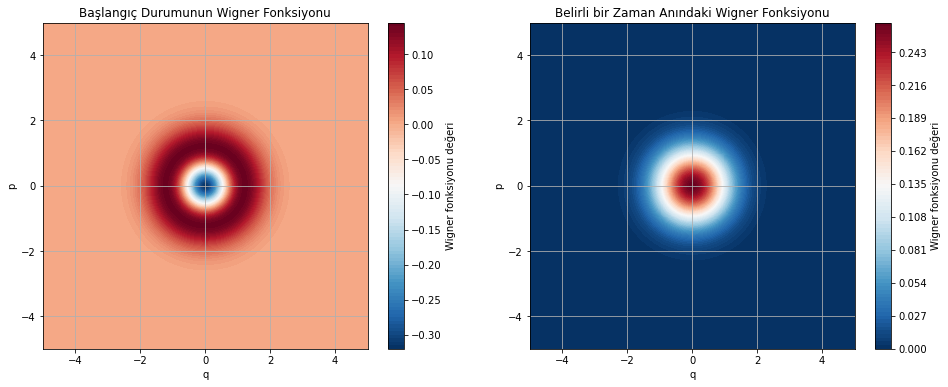

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, destroy, mesolve, expect, wigner, Qobj

# Sistem parametreleri
N = 50  # Hilbert space dimension
omega = 1.0  # Harmonic oscillator frequency
kappa = 0.1  # Damping rate
tlist = np.linspace(0, 25, 1000)  # Time array

# Başlangıç durumu |1> Fock state
psi0 = basis(N, 1)

# Operatörler
a = destroy(N)  # Annihilation operator
H = omega * a.dag() * a  # Hamiltonian

# Çözücü parametreleri
c_ops = [np.sqrt(kappa) * a]  # Collapse operators
e_ops = [a.dag() * a]  # Operators to evaluate

# Çözüm seçenekleri
options = {'store_states': True}

# Master equation çözümü
result = mesolve(H, psi0, tlist, c_ops, e_ops, options=options)

# Beklenen değerler
n_t = result.expect[0]

# Beklenen işgal sayısının zamanla değişimi
plt.figure(figsize=(10, 6))
plt.plot(tlist, n_t, label=r'$\langle n \rangle$')
plt.xlabel('Zaman')
plt.ylabel('İşgal Sayısı')
plt.title('İşgal Sayısının Zamanla Değişimi')
plt.legend()
plt.grid()
plt.savefig("occupation_number_vs_time.png")
plt.show()

# Wigner fonksiyonu başlangıç durumu için
rho_initial = psi0 * psi0.dag()  # Density matrix of initial state
xvec = np.linspace(-5, 5, 500)
W0 = wigner(rho_initial, xvec, xvec)

# Eğer `result.states` listesi boş değilse son durumu hesaplayalım
if result.states:
    rho_final = result.states[-1]  # Density matrix of final state
    W_final = wigner(rho_final, xvec, xvec)
else:
    W_final = None

# Wigner fonksiyonu plotları
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Başlangıç durumu için Wigner fonksiyonu
contour0 = axs[0].contourf(xvec, xvec, W0, 100, cmap='RdBu_r')
fig.colorbar(contour0, ax=axs[0], label='Wigner fonksiyonu değeri')
axs[0].set_title('Başlangıç Durumunun Wigner Fonksiyonu')
axs[0].set_xlabel('q')
axs[0].set_ylabel('p')
axs[0].grid()

# Wigner fonksiyonu başlangıç durumu grafiğini kaydet
fig.savefig("initial_state_wigner_function.png")

# Belirli bir zaman anı için Wigner fonksiyonu
if W_final is not None:
    contour_final = axs[1].contourf(xvec, xvec, W_final, 100, cmap='RdBu_r')
    fig.colorbar(contour_final, ax=axs[1], label='Wigner fonksiyonu değeri')
    axs[1].set_title('Belirli bir Zaman Anındaki Wigner Fonksiyonu')
    axs[1].set_xlabel('q')
    axs[1].set_ylabel('p')
    axs[1].grid()

    # Wigner fonksiyonu belirli zaman anı grafiğini kaydet
    fig.savefig("final_state_wigner_function.png")
else:
    axs[1].text(0.5, 0.5, 'Son durum bilgisi mevcut değil', horizontalalignment='center', verticalalignment='center')
    axs[1].set_title('Son Durum Bilgisi Mevcut Değil')
    axs[1].set_xlabel('q')
    axs[1].set_ylabel('p')
    axs[1].grid()

plt.show()
